Solución de la ecuación de calor
------------------------------------
**Ecuación de calor en dos dimensiones:**. 

$$\frac{\partial T}{\partial x}\left(\kappa_x\frac{\partial T}{\partial x}\right) + \frac{\partial T}{\partial y}\left(\kappa_y\frac{\partial T}{\partial y} \right)=0$$
Supuestos:
1. El material es homogéneo e isotrópico.
2. La conductividad térmica es constante.
3. No hay generación interna de calor.
4. Las condiciones de frontera son de tipo Dirichlet (temperatura fija en los bordes).

**Ecuación simplificada:**
$$\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} = 0$$

Con $\Delta x = \Delta y = h$, la ecuación se discretiza en una malla de puntos $(i,j)$.  
**Ecuación discretizada usando diferencias finitas:**
$$T_{i,j} = \frac{1}{4}(T_{i+1,j} + T_{i-1,j} + T_{i,j+1} + T_{i,j-1})$$

In [103]:
import numpy as np 
import matplotlib.pyplot as plt 
# Datos del problema
k = 0.5 # Coeficiente de difusividad térmica.

# Datos de la figura a resolver
L = 10
h = 1

# Discretización espacial:
N = int(L/h) + 1 # Número de nodos
x = np.linspace(0,L,N) # generar un arreglo de puntos equiespaciados
y = np.linspace(0,L,N)

X, Y = np.meshgrid(x,y) # generar la malla de puntos



In [104]:
# Condiciones de frontera de dirichlet:
Tinferior = 25
Tsuperior = 100
Tizquierda = 50
Tderecha = 75

# Inicialización de la matriz de temperaturas
T = np.zeros((N,N))

# Aplicación de las condiciones de frontera
T[0,:] = Tinferior
T[-1,:] = Tsuperior
T[:,0] = Tizquierda
T[:,-1] = Tderecha

<Figure size 640x480 with 0 Axes>

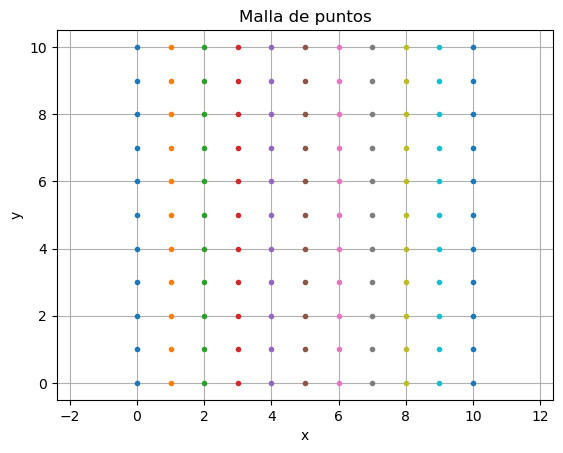

<Figure size 640x480 with 0 Axes>

In [105]:
# Graficos iniciales
plt.figure()
plt.plot(X,Y,'.') # malla
plt.title('Malla de puntos')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid()
plt.figure()


<Figure size 640x480 with 0 Axes>

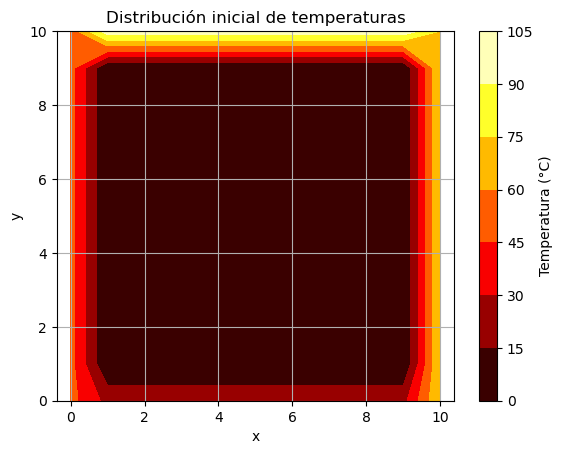

<Figure size 640x480 with 0 Axes>

In [106]:
# Gráfica de temperaturas iniciales
plt.figure()
plt.contourf(X,Y,T,cmap='hot')
plt.colorbar(label='Temperatura (°C)')
plt.title('Distribución inicial de temperaturas')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid()
plt.figure()

In [107]:
# Solución del problema por el método de diferencias finitas
tol = 1 # tolerancia del error
error_aproximado = 100
while tol < error_aproximado:
    T_vieja = T.copy() # copia de la matriz de temperaturas
    for i in range(1,N-1): # indice de cambio de las x --> columnas
        for j in range(1,N-1): # indice de cambio de las y --> filas
            T[j,i] = (T[j,i+1] + T[j,i-1] + T[j+1,i] + T[j-1,i]) / 4
    error_aproximado = np.max(abs((T-T_vieja)/T))*100
print(T)

[[ 50.          25.          25.          25.          25.
   25.          25.          25.          25.          25.
   75.        ]
 [ 50.          37.97167591  33.60895048  32.015315    31.68756892
   32.16696941  33.42436409  35.79676941  40.33484158  50.11942158
   75.        ]
 [ 50.          43.5131659   39.81886446  38.22342336  38.06432274
   39.03912723  41.15815422  44.75744608  50.63426504  60.22573934
   75.        ]
 [ 50.          46.63274658  44.49711682  43.68884633  44.05055557
   45.48457386  48.03623525  51.91981304  57.51946047  65.25823117
   75.        ]
 [ 50.          48.98101036  48.54302487  48.82813888  49.86397288
   51.67637275  54.33063045  57.93645856  62.61891147  68.41009046
   75.        ]
 [ 50.          51.24739147  52.61217335  54.11799821  55.8576121
   57.94194125  60.46332016  63.4755848   66.97756956  70.88610207
   75.        ]
 [ 50.          53.88318853  57.26194054  60.04133023  62.42379705
   64.64531471  66.85714931  69.0928121   71.27555

<Figure size 640x480 with 0 Axes>

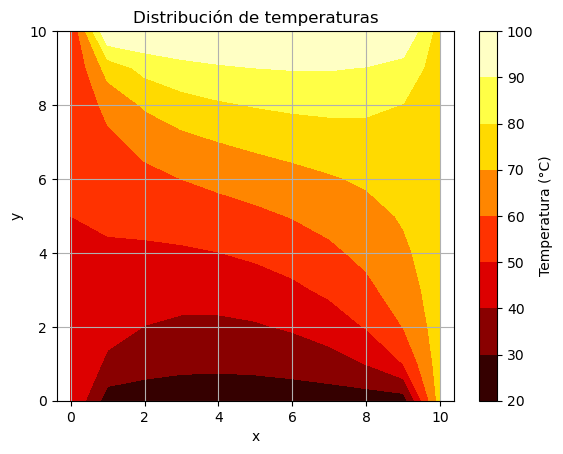

<Figure size 640x480 with 0 Axes>

In [108]:
# Gráfica de temperaturas
plt.figure()
plt.contourf(X,Y,T,cmap='hot')
plt.colorbar(label='Temperatura (°C)')
plt.title('Distribución de temperaturas')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid()
plt.figure()

In [109]:
T

array([[ 50.        ,  25.        ,  25.        ,  25.        ,
         25.        ,  25.        ,  25.        ,  25.        ,
         25.        ,  25.        ,  75.        ],
       [ 50.        ,  37.97167591,  33.60895048,  32.015315  ,
         31.68756892,  32.16696941,  33.42436409,  35.79676941,
         40.33484158,  50.11942158,  75.        ],
       [ 50.        ,  43.5131659 ,  39.81886446,  38.22342336,
         38.06432274,  39.03912723,  41.15815422,  44.75744608,
         50.63426504,  60.22573934,  75.        ],
       [ 50.        ,  46.63274658,  44.49711682,  43.68884633,
         44.05055557,  45.48457386,  48.03623525,  51.91981304,
         57.51946047,  65.25823117,  75.        ],
       [ 50.        ,  48.98101036,  48.54302487,  48.82813888,
         49.86397288,  51.67637275,  54.33063045,  57.93645856,
         62.61891147,  68.41009046,  75.        ],
       [ 50.        ,  51.24739147,  52.61217335,  54.11799821,
         55.8576121 ,  57.94194125,  60.4

Flujos
--------------
Ley de conducciòn de Fourier:
$$q_i=-\kappa\frac{\partial T}{\partial i}$$

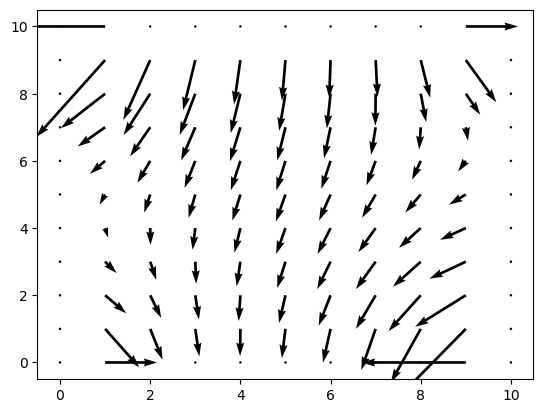

In [116]:
# Variables secundarias
# Flujos
dTdx = np.zeros([N,N])
dTdy = np.zeros([N,N])

# Derivadas en x
for i in range(1,N-1):
    dTdx[:,i] = (T[:,i+1]-T[:,i-1])/(2*h)
# Derivadas en y
for j in range(1,N-1):
    dTdy[j,:] = (T[j+1,:]-T[j-1,:])/(2*h)

#Flujos
qx = -k*dTdx
qy = -k*dTdy

plt.quiver(x,y,qx,qy)

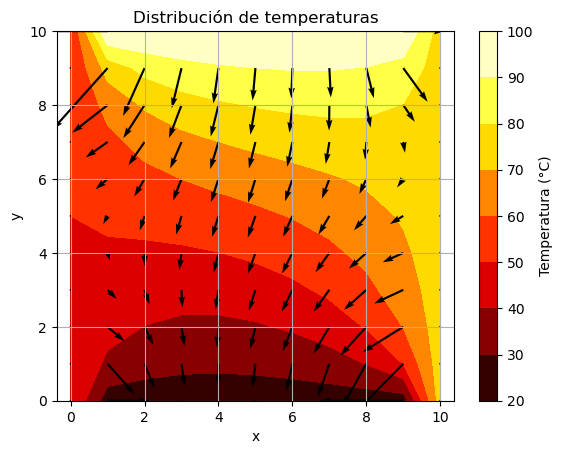

In [117]:
# Gráfica de temperaturas
plt.figure()
plt.contourf(X,Y,T,cmap='hot')
plt.colorbar(label='Temperatura (°C)')
plt.title('Distribución de temperaturas')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid()
plt.quiver(x,y,qx,qy)
plt.show()